## What is Phishing?
#### Phishing is a scam where attackers "fish" for your private info using fake links or messages that look real.
#### Phishing is a type of cyber attack where attackers trick people into revealing sensitive information like passwords, credit card numbers, or personal data by pretending to be a trustworthy source — usually through fake websites, emails, or messages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("phishing_dataset.csv")

In [3]:
df.head()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phishing
0,6,232,4,0,0,0,8,125,58,1
1,5,88,2,0,0,0,4,66,1,1
2,7,184,1,0,0,0,11,161,47,1
3,6,67,0,0,0,0,2,42,0,1
4,1,123,1,0,0,0,7,60,21,1


In [4]:
df.sample(5)

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phishing
141187,2,27,0,0,0,0,1,1,0,0
548011,3,21,0,0,1,0,0,0,10,1
390069,3,80,0,0,0,0,5,64,6,0
269742,1,38,0,0,0,0,3,16,0,0
483610,3,39,0,0,0,0,2,15,3,1


In [5]:
df.isnull().sum()

NumDots            0
UrlLength          0
NumDash            0
AtSymbol           0
IpAddress          0
HttpsInHostname    0
PathLevel          0
PathLength         0
NumNumericChars    0
Phishing           0
dtype: int64

In [6]:
df.dtypes

NumDots            int64
UrlLength          int64
NumDash            int64
AtSymbol           int64
IpAddress          int64
HttpsInHostname    int64
PathLevel          int64
PathLength         int64
NumNumericChars    int64
Phishing           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549333 entries, 0 to 549332
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   NumDots          549333 non-null  int64
 1   UrlLength        549333 non-null  int64
 2   NumDash          549333 non-null  int64
 3   AtSymbol         549333 non-null  int64
 4   IpAddress        549333 non-null  int64
 5   HttpsInHostname  549333 non-null  int64
 6   PathLevel        549333 non-null  int64
 7   PathLength       549333 non-null  int64
 8   NumNumericChars  549333 non-null  int64
 9   Phishing         549333 non-null  int64
dtypes: int64(10)
memory usage: 41.9 MB


In [8]:
df.describe()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phishing
count,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000,549333.000000
mean,2.062347,57.731891,1.126468,0.003721,0.014241,0.000073,2.386882,26.315106,4.769333,0.284749
std,1.514627,44.409792,2.424368,0.060885,0.118483,0.008533,1.513652,24.099446,11.572887,0.451295
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
50%,2.000000,47.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,1.000000,0.000000
75%,2.000000,66.000000,1.000000,0.000000,0.000000,0.000000,3.000000,36.000000,6.000000,1.000000
max,37.000000,2314.000000,42.000000,1.000000,1.000000,1.000000,34.000000,2156.000000,545.000000,1.000000


In [9]:
df.shape

(549333, 10)

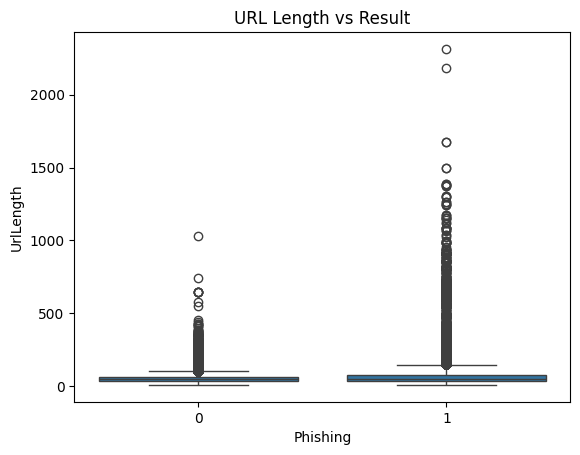

In [186]:
sns.boxplot(data=df, x='Phishing', y='UrlLength')
plt.title("URL Length vs Result")
plt.show()

In [10]:
min_range = df["UrlLength"].mean() - (3*df["UrlLength"].std())
max_range = df["UrlLength"].mean() + (3*df["UrlLength"].std())

In [11]:
min_range,max_range

(np.float64(-75.49748595019183), np.float64(190.96126839180738))

In [12]:
df = df[df["UrlLength"]<=max_range]

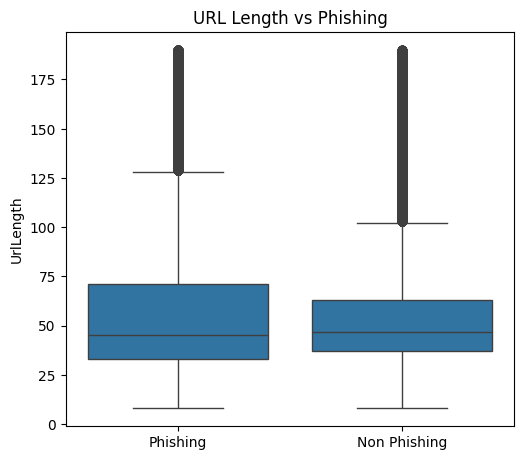

In [159]:
plt.figure(figsize=(5.79, 5.12))
df['PhishingLabel'] = df['Phishing'].map({0: "Non Phishing", 1: "Phishing"})
sns.boxplot(data=df, x='PhishingLabel', y='UrlLength')
plt.title("URL Length vs Phishing")
plt.xlabel("")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\boxplot.png", dpi=100, transparent=True)
plt.show()


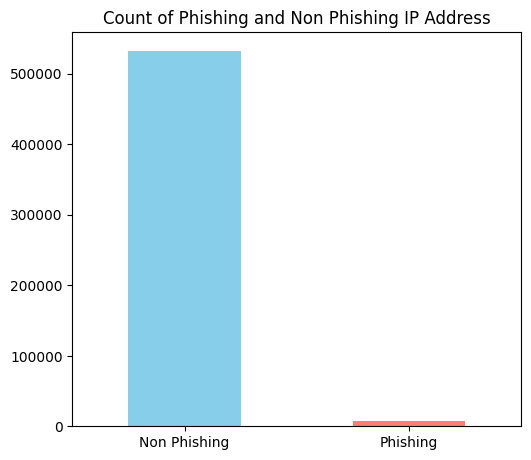

In [160]:
label_map = {0: "Non Phishing", 1: "Phishing"}
counts = df["IpAddress"].map(label_map).value_counts()
plt.figure(figsize=(5.79, 5.12))
plt.title("Count of Phishing and Non Phishing IP Address")
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.xlabel("")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\count_ip.png", dpi=100, transparent=True)

In [190]:
df.describe()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phishing
count,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000,540057.000000
mean,1.985268,53.669255,1.081341,0.003287,0.014443,0.000052,2.365845,25.770019,3.765190,0.273603
std,1.226847,26.688609,2.327840,0.057235,0.119308,0.007200,1.479090,22.345472,6.634707,0.445808
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
50%,2.000000,47.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,1.000000,0.000000
75%,2.000000,65.000000,1.000000,0.000000,0.000000,0.000000,3.000000,35.000000,6.000000,1.000000
max,28.000000,190.000000,41.000000,1.000000,1.000000,1.000000,28.000000,189.000000,120.000000,1.000000


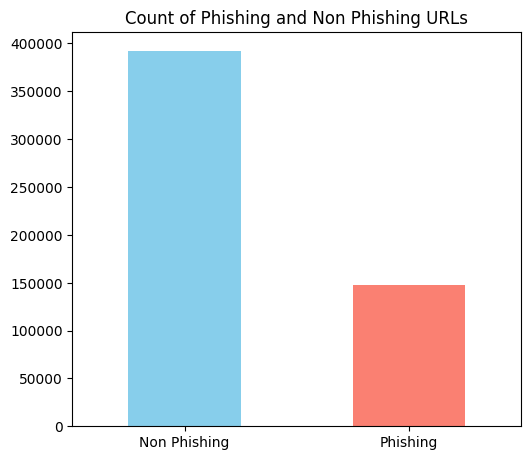

In [162]:
label_map = {0: "Non Phishing", 1: "Phishing"}
counts = df["Phishing"].map(label_map).value_counts()
plt.figure(figsize=(5.79, 5.12))
plt.title("Count of Phishing and Non Phishing URLs")
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.xlabel("")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\count_plot.png", dpi=100, transparent=True)

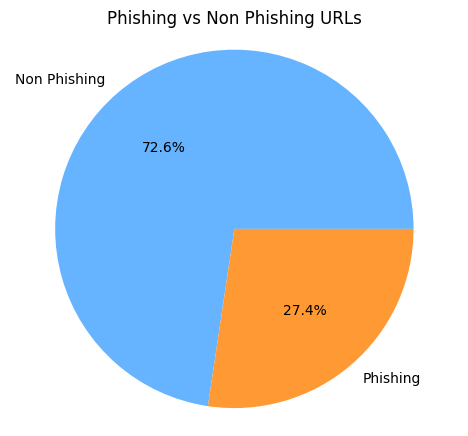

In [163]:
counts = df["Phishing"].value_counts()
label_map = {0: "Non Phishing", 1: "Phishing"}
labels = [label_map[i] for i in counts.index]
sizes = counts.values
plt.figure(figsize=(5.79, 5.12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9933'])
plt.axis('equal')
plt.axis('off')
plt.title("Phishing vs Non Phishing URLs")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\pie_chart.png", dpi=100, transparent=True)


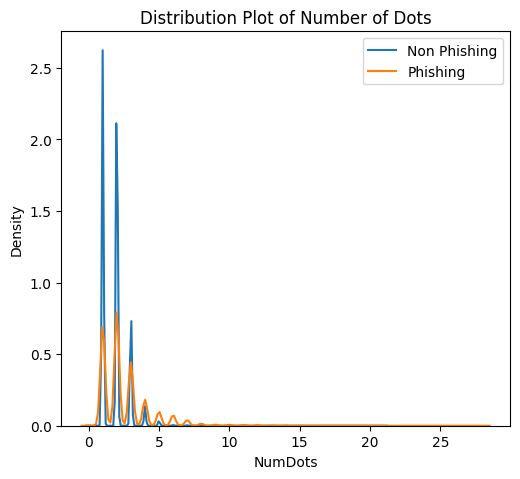

In [55]:
plt.figure(figsize=(5.79, 5.12))
sns.distplot(df[df["Phishing"]==0]['NumDots'],hist=False,label='Non Phishing')
sns.distplot(df[df["Phishing"]==1]['NumDots'],hist = False,label='Phishing')
plt.title("Distribution Plot of Number of Dots")
plt.legend()
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\distplotND.png", dpi=100, transparent=True)

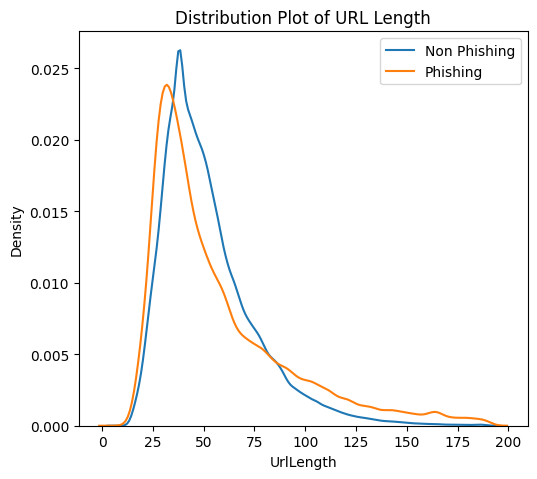

In [191]:
plt.figure(figsize=(5.79, 5.12))
sns.distplot(df[df["Phishing"]==0]['UrlLength'],hist=False,label='Non Phishing')
sns.distplot(df[df["Phishing"]==1]['UrlLength'],hist = False,label='Phishing')
plt.title("Distribution Plot of URL Length")
plt.legend()
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\distplot.png", dpi=100, transparent=True)

In [13]:
x = df.drop(columns=["Phishing"])
y = df["Phishing"]

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
rus = RandomUnderSampler(random_state=10)
x, y = rus.fit_resample(x, y)

In [16]:
x.shape,y.shape

((295522, 9), (295522,))

In [17]:
x

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars
54841,2,28,0,0,0,0,2,5,0
73184,3,36,0,0,0,0,1,12,1
370141,2,33,0,0,0,0,1,13,0
49166,2,36,0,0,0,0,2,10,0
158208,1,50,2,0,0,0,2,26,0
...,...,...,...,...,...,...,...,...,...
549328,3,22,0,0,1,0,1,1,11
549329,1,25,1,0,0,0,1,1,0
549330,1,24,1,0,0,0,1,1,0
549331,1,25,1,0,0,0,1,1,0


In [18]:
y

54841     0
73184     0
370141    0
49166     0
158208    0
         ..
549328    1
549329    1
549330    1
549331    1
549332    1
Name: Phishing, Length: 295522, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier(random_state=42,max_depth=15, min_samples_split=15)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=15, random_state=42)

In [23]:
y_pred = dt.predict(x_test)

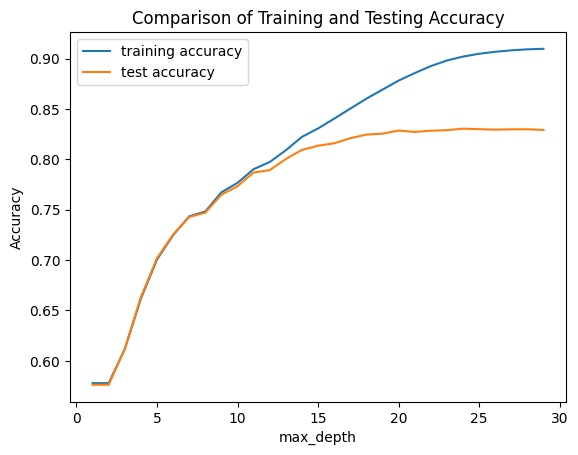

In [216]:
training_accuracy = []
test_accuracy = []
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    tree_test.fit(x_train, y_train)
    training_accuracy.append(tree_test.score(x_train, y_train))
    test_accuracy.append(tree_test.score(x_test, y_test))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();
plt.title("Comparison of Training and Testing Accuracy")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\training vs testing.png", dpi=100, transparent=True)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_pred,y_test)*100

81.2114034345656

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print("Confusion Matrix: ",confusion_matrix(y_pred,y_test))

Confusion Matrix:  [[24747  6431]
 [ 4674 23253]]


In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [29]:
print("Precision Score: ",precision_score(y_pred,y_test)*100)
print("Recall Score: ",recall_score(y_pred,y_test)*100)
print("F1 Score: ",f1_score(y_pred,y_test)*100)

Precision Score:  78.33513003638323
Recall Score:  83.26350843269954
F1 Score:  80.72416725972471


In [37]:
import pickle
pickle.dump(dt,open('Decision_Tree_Model.pkl','wb'))
pickle.dump(y_test,open('y_test.pkl','wb'))
pickle.dump(y_pred,open('y_pred.pkl','wb'))

In [38]:
import re
from urllib.parse import urlparse

def extract_features(url):
    parsed = urlparse(url)
    hostname = parsed.hostname or ""
    path = parsed.path

    features = [
        url.count('.'),                           # NumDots
        len(url),                                 # UrlLength
        url.count('-'),                           # NumDash
        1 if '@' in url else 0,                   # AtSymbol
        1 if re.match(r"^\d{1,3}(\.\d{1,3}){3}$", hostname) else 0,  # IpAddress
        1 if 'https' in hostname else 0,          # HttpsInHostname
        path.count('/'),                          # PathLevel
        len(path),                                # PathLength
        len(re.findall(r'\d', url))               # NumNumericChars
    ]
    return features

In [39]:
url = "https://www.google.com/"
features = extract_features(url)
print(features)

[2, 23, 0, 0, 0, 0, 1, 1, 0]


In [40]:
result = dt.predict([features])

In [41]:
if(result == 1):
    print("Website is not Safe.....")
else:
    print("Website is Safe for Use.......")

Website is Safe for Use.......


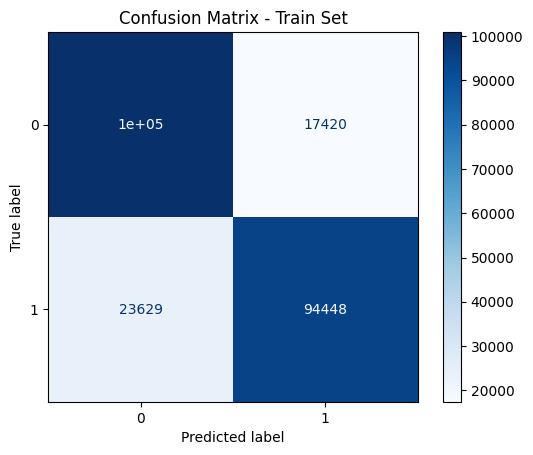

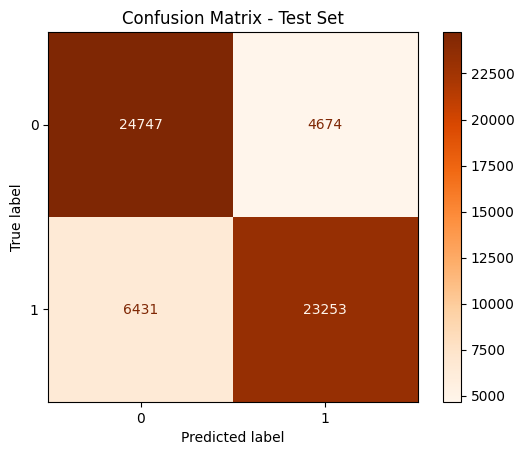

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For training set
ConfusionMatrixDisplay.from_estimator(dt, x_train, y_train, cmap='Blues')
plt.title("Confusion Matrix - Train Set")
plt.show()

# For test set
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Test Set")
plt.show()


<Figure size 300x400 with 0 Axes>

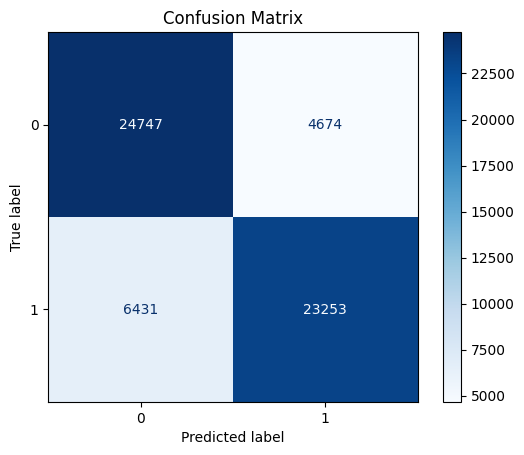

In [48]:
plt.figure(figsize=(3,4))
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig(r"C:\Users\baghe\Desktop\Machine Learning\Phishing URL Detection\static\confusion_matrix.png", dpi=100, transparent=True)
plt.show()